Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 6: Linearni diskriminativni modeli

(c) 2015 Jan Šnajder

<i>Verzija: 0.1 (2015-11-11)</i>

In [188]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Uvod

* Poopćeni linearni model

* Geometrija linearnog modela

* Višeklasna klasifikacija

* Klasifikacija regresijom

* Gradijentni spust

* Perceptron

* Sažetak

# Uvod

* **Diskriminativni modeli:** Za razliku od generativnih modela, koji modeliraju
$
P(\mathcal{C}_j|\mathbf{x})\ \propto\ P(\mathbf{x}|\mathcal{C}_j) P(\mathcal{C}_j)
$, 
modeliramo:
  * izravno aposteriornu vjerojatnost klase, $P(\mathcal{C}_j|\mathbf{x})$, ili
  * izravno *diskriminacijsku* (klasifikacijsku) funkciju $h(\mathbf{x})$
  
 
* **Linearan modeli:** Granica je linearna (hiperravnina):
 
$$
h(\mathbf{x}) = \mathbf{w}^\intercal\tilde{\mathbf{x}}
$$


* Model je linearan u značajkama $\mathbf{x}$ $\Rightarrow$ to daje linearnu granica u <u>ulaznom
prostoru</u>


* Granica je hiperravnina za koju $h(\mathbf{x})=0$ ili $h(\mathbf{x})=0.5$ (ovisno o modelu)


* Granicu zovemo **diskriminativna funkcija** (engl. *discriminative functions*) ili **granica odluke**, **decizijska granica** (engl. *decision boundary*)

In [189]:
def h(x, w): return sp.dot(x, w)

In [190]:
def plot_decision_boundary(h, boundary=0, margins=None):
    x = linspace(-10, 10)
    y = linspace(-10, 10)
    X1, X2 = np.meshgrid(x, y)
    XX = sp.dstack((sp.ones((50, 50)), X1, X2))
    plt.contour(X1, X2, h(XX), linecolor='red', levels=[boundary])
    if margins!=None:
        CS = plt.contour(X1, X2, h(XX), colors=['gray', 'gray'], levels=[margins[0],margins[1]])
        plt.clabel(CS, fontsize=9, inline=1)

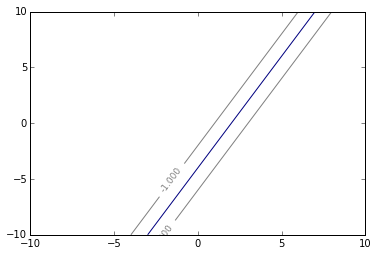

In [191]:
w = [-2, 1, -0.5]
plot_decision_boundary(lambda x : h(x, w), margins=(-1,1))

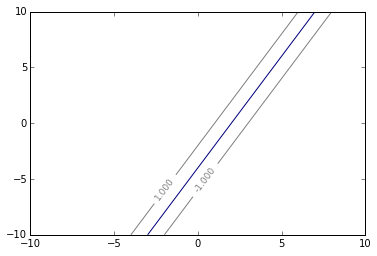

In [112]:
w = [2, -1, 0.5]
plot_decision_boundary(lambda x : h(x, w), margins=(-1,1))

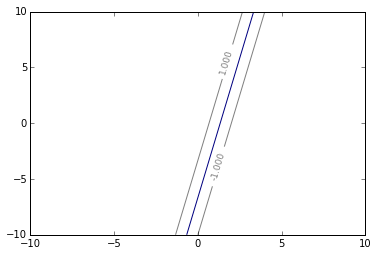

In [115]:
w = [2, -1.5, 0.3]
plot_decision_boundary(lambda x : h(x, w), margins=(-1,1))

# Poopćeni linearan model

* **Aktivacijska funkcija:** nelinearna funkcija 
$$
f:\mathbb{R}\to[0,1]
$$ 
ili
$$
f:\mathbb{R}\to[-1,1]
$$


* Poopćeni linearan model (engl. *generalized linear model*, GLM):

$$
    h(\mathbf{x}) = \color{red}{f\big(}\mathbf{w}^\intercal\tilde{\mathbf{x}}\color{red}{\big)}
$$

$\Rightarrow$ **Linearna granica** u ulaznom prostoru (premda je $f$ nelinearna)

$\Rightarrow$ Model je **nelinearan u parametrima** (jer je $f$ nelinearna)

* Tipične funkcije preslikavanja:
  * Funkcija identiteta (tj. kao da nema preslikavanja)
  * Sigmoidalna (logistička) funkcija
  * Funkcija skoka (step-funkcija)

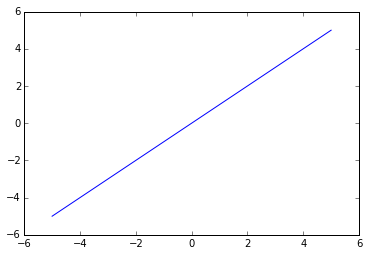

In [32]:
xs = sp.linspace(-5,5, 100)
plt.plot(xs, xs);

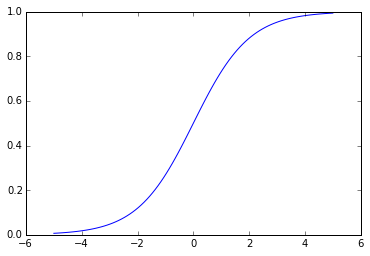

In [33]:
def sigm(x): return 1 / (1 + sp.exp(-x))

plt.plot(xs, sigm(xs));

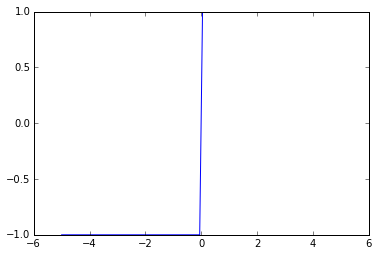

In [34]:
plt.plot(xs, sign(xs));

* Odabir funkcije $f$ nema utjecaja na linearnost granice, budući da će, očigledno, funkcija $f$ za iste ulazne vrijednosti $\mathbf{w}^\intercal\mathbf{x}$ davati iste vrijednosti $f(\mathbf{w}^\intercal\mathbf{x})$

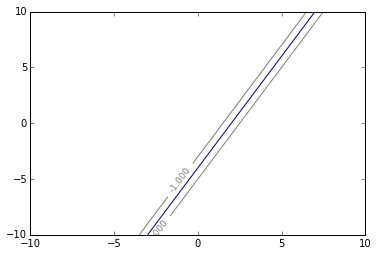

In [192]:
w = [-4, 2, -1]
plot_decision_boundary(lambda x : h(x, w), margins=(-1,1))

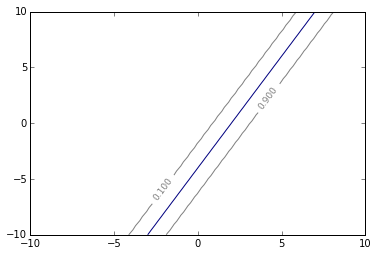

In [193]:
plot_decision_boundary(lambda x : sigm(sp.dot(x, w)), boundary=0.5, margins=(0.1,0.9))

Kao i kod regresije, možemo koristiti preslikavanje
    $\boldsymbol{\phi}:\mathbb{R}^n\to\mathbb{R}^m$ iz ulaznog
prostora u prostor značajki:

$$
    h(\mathbf{x}) = f\big(\mathbf{w}^\intercal\mathbf{\phi}(\mathbf{x})\big)
$$

$\Rightarrow$ Linearna granica u prostoru značajki

$\Rightarrow$ **Nelinearna granica** u ulaznom
prostoru

$\Rightarrow$ Model je **nelinearan u parametrima** (jer je $f$ nelinearna)


### Primjer:

* Preslikavanje iz dvodimenzijskog ulaznog prostora u 5-dimenzijski prostor značajki

$$
\boldsymbol{\phi}(\mathbf{x}) = (1,x_1,x_2,x_1 x_2, x_1^2, x_2^2)
$$

In [194]:
def h2(x, w): 
    x2 = sp.dstack((x, x[:,:,1]*x[:,:,2], x[:,:,1]**2, x[:,:,2]**2))
    return sp.dot(x2, w)

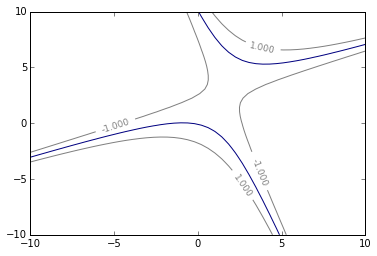

In [121]:
w = [-0.05 , -0.15 , -0.5 ,  0.15  , -0.08  ,  0.05]
plot_decision_boundary(lambda x : h2(x, w), margins=[-1, 1])

# Geometrija linearnog modela

* [Skica]


* Za točke $\mathbf{x}_1$ i $\mathbf{x}_2$ na hiperravnini:
$$
h(\mathbf{x}_1)=h(\mathbf{x}_2)=0\quad \Rightarrow\quad \mathbf{w}^\intercal(\mathbf{x}_1-\mathbf{x}_2) = 0
$$
$\Rightarrow$ $\mathbf{w}$ je normala hiperravnine


* **NB:** U iduće dvije točke $\mathbf{w}$ ne uključuje $w_0$


* Za točku $\mathbf{x}$ na hiperravnini:
$$
\mathbf{w}^\intercal\mathbf{x} + w_0 = 0 \quad\Rightarrow\quad
\frac{\mathbf{w}^\intercal\mathbf{x}}{\|\mathbf{w}\|}=-\frac{w_0}{\|\mathbf{w}\|}
$$
$\Rightarrow$ udaljenost ravnine od ishodišta je $-w_0/\|\mathbf{w}\|$


* Za točku $\mathbf{x}$ izvan hiperravnine:
$$
\begin{align*}
\mathbf{x} &= \mathbf{x}_{\bot} + d\frac{\mathbf{w}}{\|\mathbf{w}\|}\\
\mathbf{w}^\intercal\mathbf{x} + w_0 &= \mathbf{w}^\intercal\mathbf{x}_{\bot} + w_0 + d \frac{\mathbf{w}^\intercal\mathbf{w}}{\|\mathbf{w}\|}\\
h(\mathbf{x}) &= d \|\mathbf{w}\|
\end{align*}
$$

$\Rightarrow$ udaljenost točke $\mathbf{x}$ od ravnine je $d=h(\mathbf{x})/\|\mathbf{w}\|$
  * $h(\mathbf{x}) > 0\ \Rightarrow\ $ $\mathbf{x}$ je na strani hiperravnine u smjeru normale $\mathbf{w}$
  * $h(\mathbf{x}) < 0\ \Rightarrow\ $ $\mathbf{x}$ je na suprotnoj strani hiperravnine
  * $h(\mathbf{x}) = 0\ \Rightarrow\ $ $\mathbf{x}$ je na hiperravnini

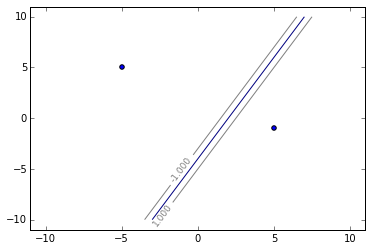

In [122]:
w = sp.array([-4, 2, -1])
X = sp.array([[1, 5, -1],
              [1, -5, 5]])

plot_decision_boundary(lambda x : h(x, w), margins=(-1, 1))
plt.scatter(X[:,1],X[:,2]);

In [78]:
h(X[0], w)

7

In [82]:
h(X[1], w)

-19

In [176]:
sp.linalg.norm(w[1:])

2.2360679774997898

In [195]:
def distance(x,w): return sp.dot(x, w) / sp.linalg.norm(w[1:])

In [196]:
distance(X[0], w)

3.1304951684997055

In [180]:
distance(X[1], w)

-8.4970583144992009

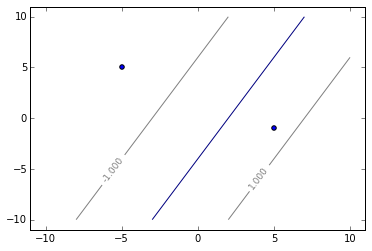

In [181]:
w2 = w/10.0

plot_decision_boundary(lambda x : h(x, w2), margins=(-1,1))
plt.scatter(X[:,1],X[:,2]);

In [182]:
h(X[0], w2)

0.69999999999999996

In [183]:
h(X[1], w2)

-1.8999999999999999

In [185]:
sp.linalg.norm(w2[1:])

0.223606797749979

In [186]:
distance(X[0], w2)

3.1304951684997051

In [187]:
distance(X[1], w2)

-8.4970583144991991

# Višeklasna klasifikacija ($K>2$)


* Shema **jedan-naspram-jedan** (engl. *one-vs-one*, **OVO**)   
  * $K\choose 2$ binarnih klasifikatora, razdjeljuju sve parove klasa
  * Model:
$$
h(\mathbf{x})=\mathrm{argmax}_i\sum_{i\neq j}\mathrm{sgn}\big(h_{ij}(\mathbf{x})\big)
$$
gdje $h_{ji}(\mathbf{x})=- h_{ij}(\mathbf{x})$


* [Skica: OVO]


* Shema **jedan-naspram-ostali** (engl. *one-vs-rest*, **OVR**, *one-vs-all*) 
  * $K$ binarnih klasifikatora s pouzdanošću, po jedan za svaku klasu
  * Model:
$$
h(\mathbf{x}) = \mathrm{argmax}_j\ h_j(\mathbf{x})
$$


* [Skica: OVR]


* Prednost OVR nad OVO je da imamo manje modela, međutim OVR lako rezultira neuravnoteženim brojem primjera kroz klase

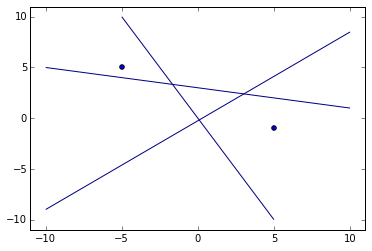

In [197]:
h1 = lambda x: h(x, [0, 2, 1])
plot_decision_boundary(h1)
h2 = lambda x: h(x, [-0.2, 0.7, -0.8])
plot_decision_boundary(h2)
h3 = lambda x: h(x, [-1.5, 0.1, 0.5])
plot_decision_boundary(h3)
plt.scatter(X[:,1],X[:,2]);

In [152]:
print h1(X[0]), h2(X[0]), h3(X[0])

9 4.1 -1.5


In [153]:
print h1(X[1]), h2(X[1]), h3(X[1])

-5 -7.7 0.5


In [198]:
def ovr(x): return sp.argmax([h1(x), h2(x), h3(x)])

In [199]:
ovr(X[0])

0

In [200]:
ovr(X[1])

2

In [157]:
x = linspace(-10, 10)
y = linspace(-10, 10)
X1, X2 = np.meshgrid(x, y)
XX = sp.dstack((sp.ones((50, 50)), X1, X2))

In [166]:
n, m, _ = shape(XX)
YY = sp.zeros((n,m))
for i in range(0,n):
    for j in range(0,m):
        YY[i,j] = ovr(XX[i, j])

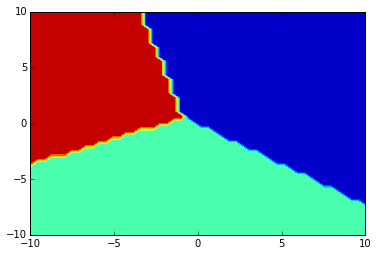

In [175]:
plt.contourf(X1, X2, YY);

# Klasifikacija regresijom

### Podsjetnik

* [Skica]


* Funkcija pogreške (empirijsko očekivanje kvadratnog gubitka):
$$
E(\mathbf{w}|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(\mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x}^{(i)}) - y^{(i)}\big)^2 = 
\frac{1}{2}
(\boldsymbol\Phi\mathbf{w} - \mathbf{y})^\intercal
(\boldsymbol\Phi\mathbf{w} - \mathbf{y})
$$


* Minimizator pogreške:
$$
    \mathbf{w} = (\boldsymbol\Phi^\intercal\boldsymbol\Phi)^{-1}\boldsymbol\Phi^\intercal\mathbf{y}
    = \color{red}{\boldsymbol\Phi^{+}}\mathbf{y}
$$


* **Q:** Kako iskoristiti regresiju za klasifikaciju?

### Binarna klasifikacija $(K=2)$

* Ideja: regresijska funkcija $h(\mathbf{x})$ koja za primjere iz klase $\mathcal{C}_1$ daje $h(\mathbf{x})=1$, a za primjere iz klase $\mathcal{C}_2$ daje $h(\mathbf{x})=0$ 


* Primjer $\mathbf{x}$ klasificiriamo u klasu $\mathcal{C}_j$ za koju je $h(\mathbf{x})$ najveći


* Granica između $\mathcal{C}_1$ i $\mathcal{C}_2$ je na $h(\mathbf{x})=0.5$


* Primjer za $n=1$
  * $h(x) = w0 + w1 x$
  * [Skica]


* Primjer za $n=2$
  * $h(x) = w0 + w1 x_1 + w2 * x_2$
  * [Skica]
  
  
* Alternativno, model možemo trenirati tako da za primjere iz klase $\mathcal{C_2}$ bude ciljana vrijednost bude $y=-1$
  * Diskriminativna funkcija onda je $h(\mathbf{x})=0$

### Višeklasna klasifikacija  $(K>2)$

* Shema jedan-naspram-ostali (OVR)


* Treniramo po jedan model $h_j$ za svaku klasu $\mathcal{C}_j$

$$
h_j(\mathbf{x}) = \mathbf{w}_j^\intercal\boldsymbol{\phi}(\mathbf{x})
$$

* Primjeri za učenje $\mathcal{D}=\{\mathbf{x}^{(i)},\color{red}{\mathbf{y}^{(i)}}\}_{i=1}^N$:

\begin{align*}
\boldsymbol\Phi = 
\begin{pmatrix}
    \boldsymbol{\phi}(\mathbf{x}^{(1)})^\intercal \\
    \boldsymbol{\phi}(\mathbf{x}^{(2)})^\intercal \\
\vdots\\
    \boldsymbol{\phi}(\mathbf{x}^{(N)})^\intercal \\
\end{pmatrix}_{N\times (m+1)}
&
\qquad
    \color{red}{\mathbf{y}_j} = 
\begin{pmatrix}
    y_j^{(1)}\\
    y_j^{(2)}\\
    \vdots\\
    y_j^{(N)}
\end{pmatrix}_{N\times 1}
\end{align*}


* [Primjer] 


* Rješenje koje minimizira kvadratnu pogrešku:
\begin{equation*}
\mathbf{w}_j = (\boldsymbol\Phi^\intercal\boldsymbol\Phi)^{-1}\boldsymbol\Phi^\intercal\mathbf{y}_j = \boldsymbol\Phi^{+}\mathbf{y}_j
\end{equation*}


* Model (OVR):
$$
h(\mathbf{x}) = \mathrm{argmax}_j\ \mathbf{w}_j\boldsymbol\phi(\mathbf{x})
$$

* Primjer ($K=3$)

![Tri ravnine](images/ravnine3.png)




### Prednosti i nedostatci klasifikacije regresijom

* Prednosti:
  * Rješenje u zatvorenoj formi
  * Jednostavan postupak


* Nedostatci:
   * Izlazi modela nemaju vjerojatnosnu intepretaciju ($h(\mathbf{x})$ nije ograničena na interval $[0,1]$)
   * Nerobusnost: osjetljivost na vrijednosti koje odskaču (kažnjavanje "pretočno''
        klasificiranih primjera)
   * Zbog toga, u nekim slučajevima: pogrešna klasifikacija unatoč tome što su primjeri linearno odvojivi


* [Primjer]

# Gradijentni spust

# Perceptron

# Sažetak

* **Diskriminativni linearni modeli** modeliraju granicu između klasa, ali ne i način generiranja primjera


* **Poopćeni linearan model** je linearan model s aktivacijskom funkcijom


* **Klasifikacija regresijom** je jednostavan postupak, ali nije robusan


* **Konveksna optimizacija** važna je za strojno učenje jer je funkcija gubitka (a time i funkcija pogreške) tipično konveksna


* Ako minimizacija pogreške nema rješenje u zatvorenoj formi, a možemo izračunati gradijent, onda možemo primijeniti **gradijentni spust**


* **Perceptron** je linearan klasifikacijski model koji gradijentnim spustom mimimizira aproksimaciju broja pogrešnih klasifikacija


* Perceptron **ne konvergira** za linearno nedvojive probleme, dok za linearno odvojive rješenje ovisi o inicijalizaciji i redoslijedu primjera


* Niti regresija niti perceptron ne daju probabilistički izlaz